# 1. Load and Inspect Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('../data/water.csv')
data.head(2)

,Unnamed: 0,Canal_id,year,Canal_name,Sample_water_point,TEMP. (oC),pH,DO (mg/l),H2S (mg/l),BOD (mg/l),COD (mg/l),SS (mg/l),TKN (mg/l),NH3N (mg/l),NO2 (mg/l),NO3 (mg/l),T-P (mg/l),T.Coliform (col/100ml),Sample_water_point (EN),Canal_name (EN)
0,1,12.0,2561,คลองคูเมืองเดิม,ปตร.ราชินี,25.0,8.0,2.7,0.0,5.0,42.0,26.0,2.2,0.9,0.0,2.2,0.1,930000.0,Her Royal Highness Princess Maha Chakri Sirind...,Khlong Khu Mueang Derm
1,2,13.0,2561,คลองคูเมืองเดิม,หน้ากรมที่ดิน,25.0,8.1,2.4,0.0,5.0,53.0,25.0,1.7,0.6,0.0,2.2,0.1,11000000.0,Department of Lands page,Khlong Khu Mueang Derm


In [3]:
data.shape

(917, 20)

In [4]:
data.columns

Index(['Unnamed: 0', 'Canal_id', 'year', 'Canal_name', 'Sample_water_point',
       'TEMP. (oC)', '  pH', 'DO (mg/l)', 'H2S (mg/l)', 'BOD (mg/l)',
       'COD (mg/l)', 'SS (mg/l)', 'TKN (mg/l)', 'NH3N (mg/l)', 'NO2 (mg/l)',
       'NO3 (mg/l)', 'T-P (mg/l)', 'T.Coliform (col/100ml)',
       'Sample_water_point (EN)', 'Canal_name (EN)'],
      dtype='object')

In [5]:
# Rename the columns
cols = {
    'Unnamed: 0': 'Index',
    'Canal_id': 'CID',
    'year': 'Year',
    'Canal_name': 'CN',
    'Sample_water_point': 'WSP',
    'TEMP. (oC)': 'Temp',
    '  pH': 'pH',
    'DO (mg/l)': 'DO',
    'H2S (mg/l)': 'HS',
    'BOD (mg/l)': 'BO',
    'COD (mg/l)': 'CO',
    'SS (mg/l)': 'SS',
    'TKN (mg/l)': 'TKN',
    'NH3N (mg/l)': 'AN',
    'NO2 (mg/l)': 'NO2N',
    'NO3 (mg/l)': 'NO3N',
    'T-P (mg/l)': 'TP',
    'T.Coliform (col/100ml)': 'TC',
    'Sample_water_point (EN)': 'WSPEN',
    'Canal_name (EN)': 'CNEN'
}


data = data.rename(columns=cols)
data.columns

Index(['Index', 'CID', 'Year', 'CN', 'WSP', 'Temp', 'pH', 'DO', 'HS', 'BO',
       'CO', 'SS', 'TKN', 'AN', 'NO2N', 'NO3N', 'TP', 'TC', 'WSPEN', 'CNEN'],
      dtype='object')

# 2. Exploratory Data Analysis (EDA)

Drop unnecessary columns from the dataset.

In [6]:
# We have translated Canal Name and Water Source Point. So drop those columns in thai language.
data.drop(columns=['Index', 'CN', 'WSP'], inplace=True)

In [7]:
data['CNEN'].value_counts()

CNEN
Khlong Saen Saep                               33
Khlong Prem Prachakorn                         24
Khlong Chong Nonsi                             18
Khlong Phlapphla                               18
Khlong Rob Krung                               18
                                               ..
Khlong Bang Luang                               1
Khlong Phraya Suren                             1
Khlong Phra Rajadamri 1 (Khlong Bueng Phai)     1
Khlong Tanod                                    1
Orachon Canal                                   1
Name: count, Length: 168, dtype: int64

**Data Preprocessing**

In [8]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
CID,917.0,7.297593e+02,5.539785e+02,12.0,2.210000e+02,5.910000e+02,1.191000e+03,1.822000e+03
Year,917.0,2.562009e+03,8.200079e-01,2561.0,2.561000e+03,2.562000e+03,2.563000e+03,2.563000e+03
Temp,917.0,2.869433e+01,1.845115e+00,0.0,2.850000e+01,2.900000e+01,2.930000e+01,3.190000e+01
pH,917.0,7.242007e+00,4.628296e-01,0.0,7.130000e+00,7.290000e+00,7.400000e+00,9.100000e+00
DO,917.0,1.667045e+00,1.282984e+00,0.0,5.100000e-01,1.600000e+00,2.600000e+00,9.700000e+00
HS,917.0,1.798037e-01,3.896647e-01,0.0,0.000000e+00,0.000000e+00,2.000000e-01,5.000000e+00
BO,917.0,1.280267e+01,9.397183e+00,0.0,6.250000e+00,9.800000e+00,1.583000e+01,8.450000e+01
CO,917.0,6.410376e+01,2.235050e+01,0.0,5.100000e+01,6.050000e+01,7.210000e+01,2.020000e+02
SS,917.0,2.195372e+01,1.719485e+01,0.0,1.200000e+01,1.700000e+01,2.600000e+01,1.483000e+02
TKN,917.0,7.999945e+00,5.133194e+00,0.0,4.100000e+00,7.100000e+00,1.080000e+01,3.980000e+01


Check for column types.

In [9]:
data.dtypes

CID      float64
Year       int64
Temp     float64
pH       float64
DO       float64
HS       float64
BO       float64
CO       float64
SS       float64
TKN      float64
AN       float64
NO2N     float64
NO3N     float64
TP       float64
TC       float64
WSPEN     object
CNEN      object
dtype: object

In [10]:
# using label encoding for these 4 features
# as they are objects and need to be a real num or a int.

from sklearn.preprocessing import LabelEncoder

features = ["WSPEN", "CNEN"]

for feat in features:
    le = LabelEncoder()
    data[feat] = le.fit_transform(data[feat])

Check for null values in the dataset.

In [11]:
data.isna().sum()

CID      0
Year     0
Temp     0
pH       0
DO       0
HS       0
BO       0
CO       0
SS       0
TKN      0
AN       0
NO2N     0
NO3N     0
TP       0
TC       0
WSPEN    0
CNEN     0
dtype: int64

Seems we have no null values in our dataset.

In [12]:
data.head()

,CID,Year,Temp,pH,DO,HS,BO,CO,SS,TKN,AN,NO2N,NO3N,TP,TC,WSPEN,CNEN
0,12.0,2561,25.0,8.0,2.7,0.0,5.0,42.0,26.0,2.2,0.9,0.00,2.2,0.1,930000.0,61,61
1,13.0,2561,25.0,8.1,2.4,0.0,5.0,53.0,25.0,1.7,0.6,0.00,2.2,0.1,11000000.0,58,61
2,14.0,2561,25.0,8.0,1.7,0.0,5.0,56.0,24.0,2.2,0.6,0.34,2.3,0.2,4600000.0,114,61
3,15.0,2561,25.0,7.9,3.0,0.0,4.0,47.0,17.0,2.8,0.6,0.00,1.9,0.1,30000.0,155,61
4,16.0,2561,25.0,7.3,1.4,0.0,6.0,36.0,7.0,2.8,0.6,0.14,1.1,0.3,1500000.0,28,61


In [13]:
# Skewness and Kurtosis of numerical columns
print("Skewness:\n", data.select_dtypes(include='number').skew())

Skewness:
 CID       0.465911
Year     -0.016114
Temp    -12.500872
pH      -12.456230
DO        0.672971
HS        5.532990
BO        2.243097
CO        2.282213
SS        3.015937
TKN       1.404893
AN        1.444743
NO2N      0.935423
NO3N      2.221041
TP        0.721560
TC             NaN
WSPEN    -0.004069
CNEN     -0.010430
dtype: float64


In [14]:
print("\nKurtosis:\n", data.select_dtypes(include='number').kurtosis())


Kurtosis:
 CID       -1.116403
Year      -1.512721
Temp     190.207743
pH       195.164468
DO         1.272318
HS        48.930997
BO         7.508975
CO         9.833919
SS        13.187015
TKN        3.640077
AN         2.644681
NO2N       0.777716
NO3N      15.322368
TP         0.871746
TC              NaN
WSPEN     -1.254632
CNEN      -1.062828
dtype: float64


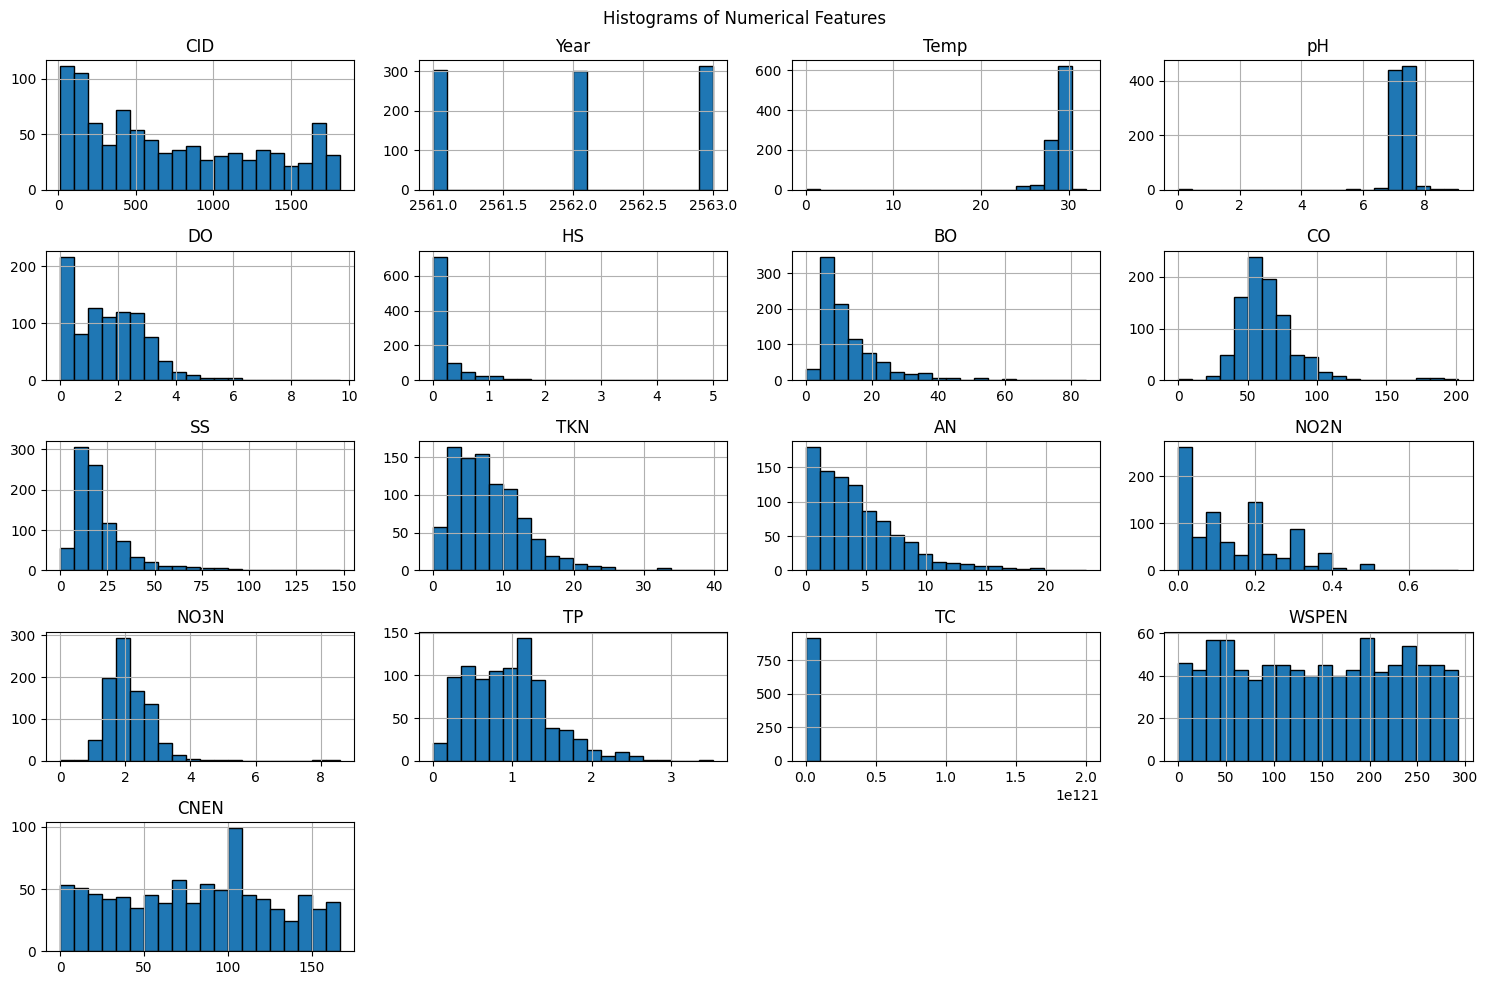

In [15]:
# Visualize distribution of numerical features
data.select_dtypes(include='number').hist(bins=20, figsize=(15,10), edgecolor='black')
plt.suptitle("Histograms of Numerical Features")
plt.tight_layout()
plt.show()

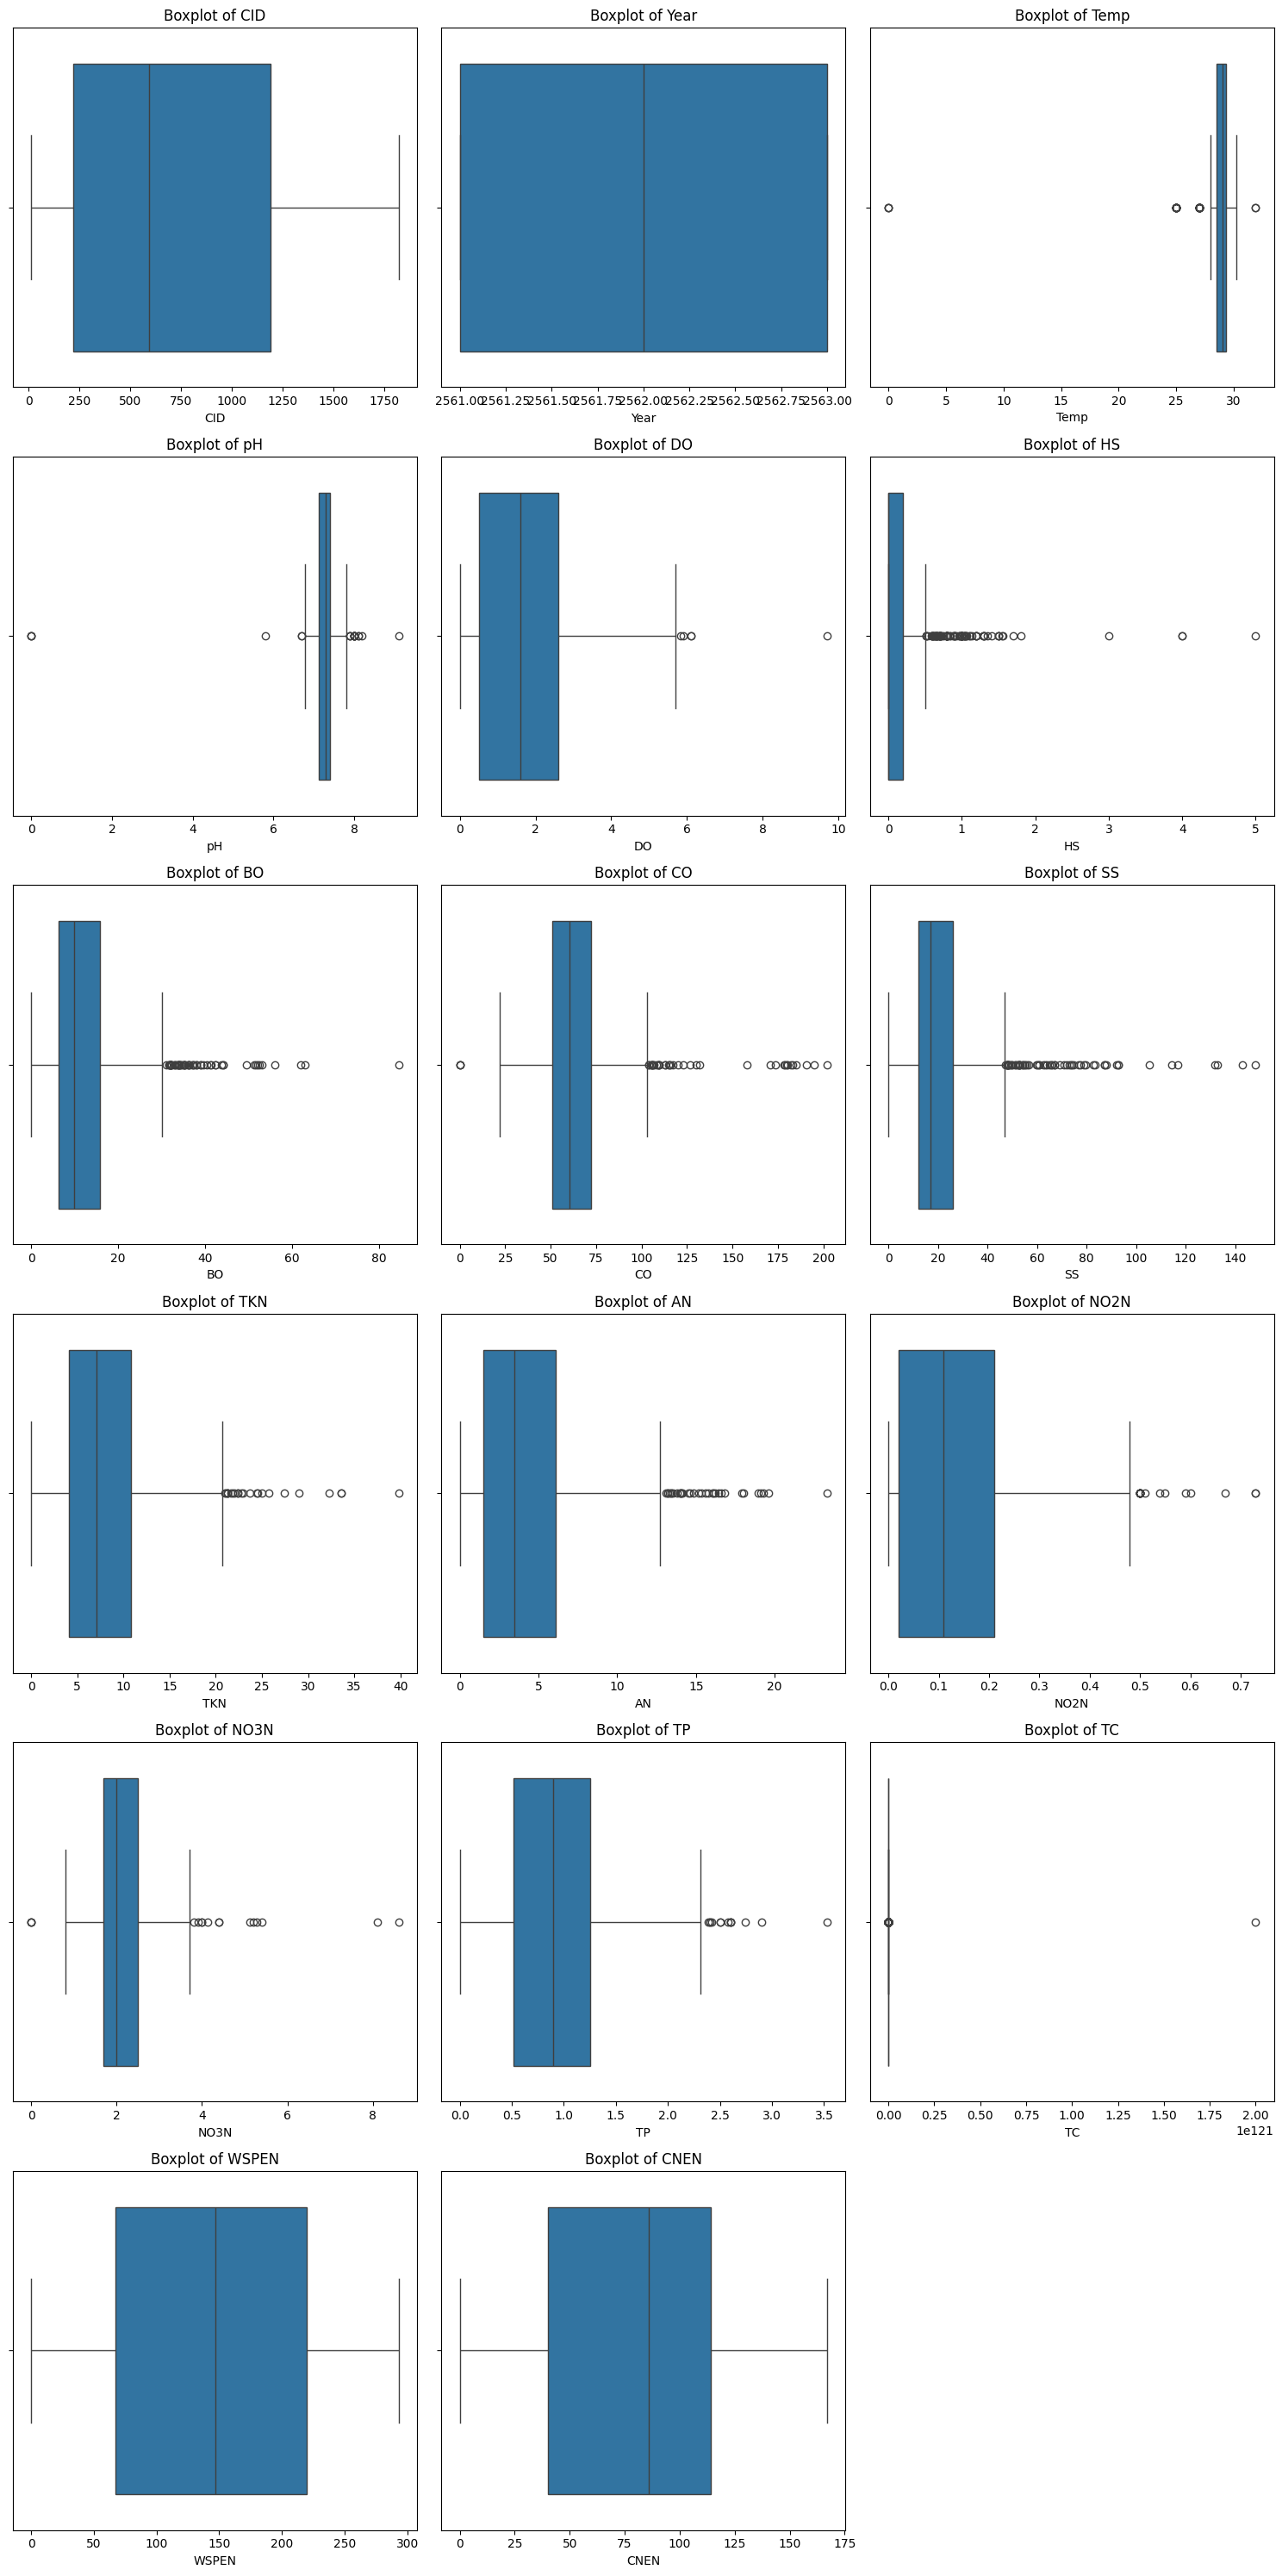

In [16]:
# Create boxplots to detect outliers
import math
numeric_cols = data.select_dtypes(include='number').columns
rows = math.ceil(len(numeric_cols)/3)

plt.figure(figsize=(15, 5 * rows))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(rows, 3, i)
    sns.boxplot(x=data[col])
    plt.title(f"Boxplot of {col}")
plt.tight_layout()
plt.show()

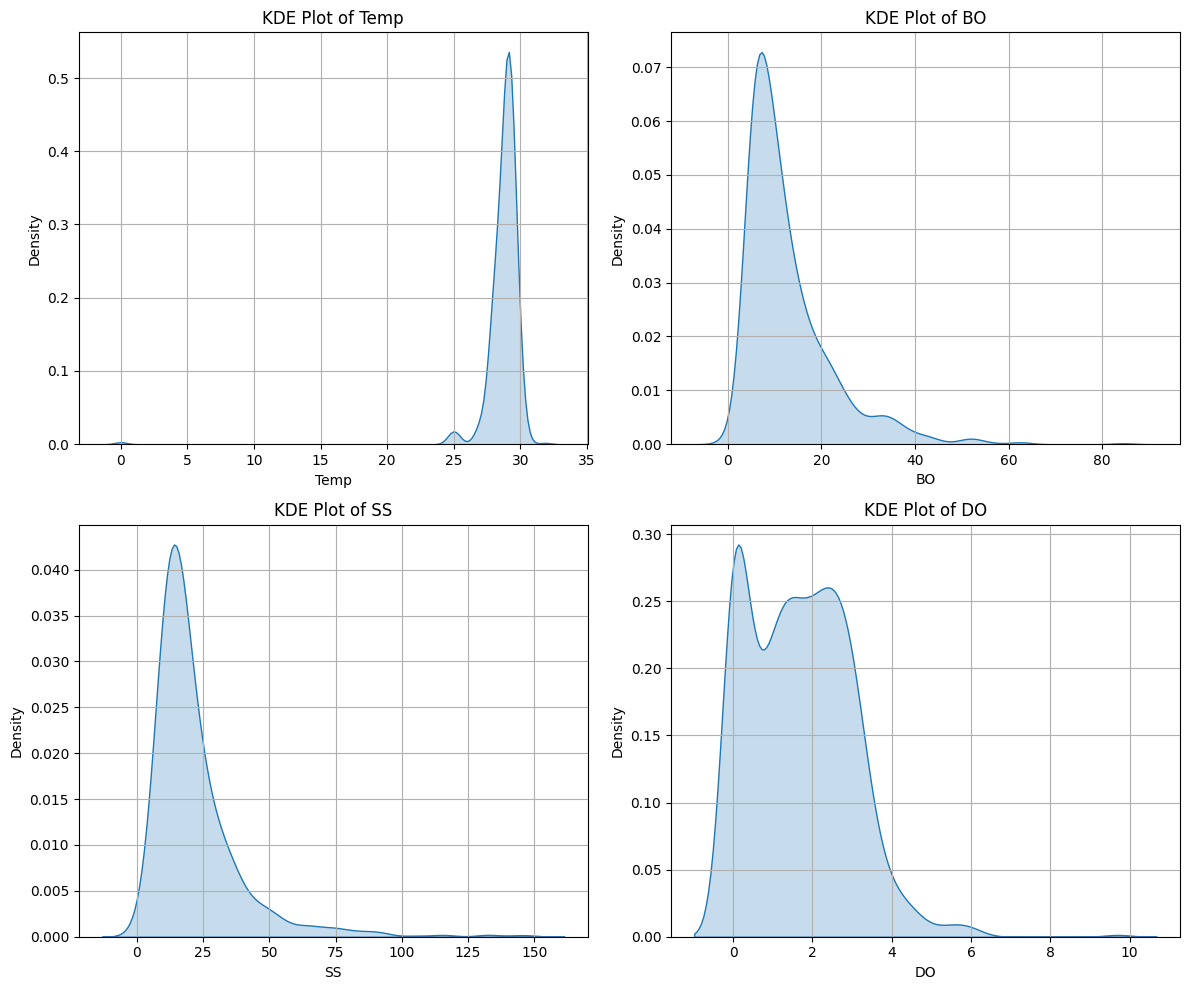

In [17]:
features = ['Temp', 'BO', 'SS', 'DO']

fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()

for i, col in enumerate(features):
    sns.kdeplot(data[col], fill=True, ax=axes[i])
    axes[i].set_title(f"KDE Plot of {col}")
    axes[i].grid(True)

plt.tight_layout()
plt.show()


In [18]:
from scipy.stats import zscore

z_scores = np.abs(zscore(data.select_dtypes(include='number')))
outlier_mask = (z_scores > 3)
outliers = (outlier_mask.sum(axis=1) > 0)
print("Outlier Rows:", outliers.sum())


Outlier Rows: 88


In [19]:
data['TC'].describe()

count     9.170000e+02
mean     2.181025e+118
std      6.604582e+119
min       0.000000e+00
25%       1.220000e+08
50%       1.530000e+10
75%       2.100000e+12
max      2.000000e+121
Name: TC, dtype: float64

**Feature Engineering**

Here lets engineer a new feature called WQI (Simple Water Quality Index) using the formula 
- WQI = ITEMP * (IBOD + ITSS + IDO)
where,
    - ITEMP = Water Temperature Index
    - IBOD = Biological Oxygen Demand Index
    - ITSS = Total Suspended Solids Index
    - IDO = Dissolved Oxygen Index

In [20]:
# data["TDS"] = (
#     0.6 * data["NO3N"] +
#     0.8 * data["NO2N"] +
#     0.5 * data["TKN"] +
#     0.7 * data["AN"] + #NH3N
#     0.9 * data["TP"] +
#     0.05 * data["SS"]
# )

# data['TDS'] = data['TDS'] * 50  #tuned for COND 200–1500 μS/cm
# data['COND'] = 0.7 * data['TDS']

In [21]:
# data['COND'].describe()

In [22]:

# Calculate TDS and COND
data['TDS'] = (
    0.6 * data['NO3N'] +
    0.8 * data['NO2N'] +
    0.5 * data['TKN'] +
    0.7 * data['AN'] +
    0.9 * data['TP']
)


# Scale TDS for realistic COND (200–1500 μS/cm)
data['TDS'] = data['TDS'] * 50
data['COND'] = 0.7 * data['TDS']

def calculate_wqi(row):
    # Extract parameters from the row
    temperature = row['Temp']
    bod = row['BO']
    tss = row['SS']
    do = row['DO']
    cond = row['COND']
    
    # Temperature Index (ITEMP)
    if temperature <= 20:
        itemp = 1
    else:
        itemp = max(0, 1 - 0.05 * (temperature - 20))
    
    # Biological Oxygen Demand Index (IBOD)
    if bod == 0:
        ibod = 30
    elif 0 < bod <= 12:
        ibod = max(0, 30 - 2.5 * bod)
    else:
        ibod = 0
    
    # Total Suspended Solids Index (ITSS)
    if tss == 0:
        itss = 25
    elif 0 < tss <= 250:
        itss = max(0, 25 - 0.1 * tss)
    else:
        itss = 0
    
    # Dissolved Oxygen Index (IDO)
    if do >= 10:
        ido = 25
    elif 0 < do < 10:
        ido = 2.5 * do
    else:
        ido = 0
    
    # Conductivity Index (ICOND)
    if cond <= 200:
        icond = 20
    elif 200 < cond <= 4000:
        icond = max(0, 20 - (20 / 3800) * (cond - 200))
    else:
        icond = 0
    
    # ISQA Calculation
    wqi = itemp * (ibod + itss + ido + icond)
    return wqi

data['WQI'] = data.apply(calculate_wqi, axis=1)

In [23]:
data['WQI'].describe()

count    917.000000
mean      30.035712
std        6.566263
min       16.112684
25%       24.683116
50%       29.271258
75%       34.832976
max       75.000000
Name: WQI, dtype: float64

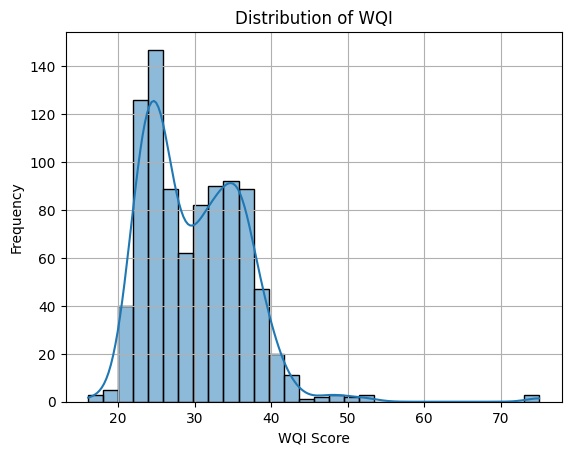

In [24]:
sns.histplot(data['WQI'], bins=30, kde=True)
plt.title("Distribution of WQI")
plt.xlabel("WQI Score")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()


In [25]:
correlations = data.corr(numeric_only=True)['WQI'].sort_values(ascending=False)
print("Top correlated features with WQI:\n", correlations)


Top correlated features with WQI:
 WQI      1.000000
DO       0.515360
NO2N     0.087476
WSPEN    0.003906
SS      -0.037381
TC      -0.039530
CNEN    -0.043109
CID     -0.076601
NO3N    -0.166947
pH      -0.287209
Year    -0.334416
HS      -0.413002
CO      -0.442552
Temp    -0.528225
BO      -0.676247
TP      -0.705647
AN      -0.710860
TKN     -0.728358
COND    -0.738159
TDS     -0.738159
Name: WQI, dtype: float64


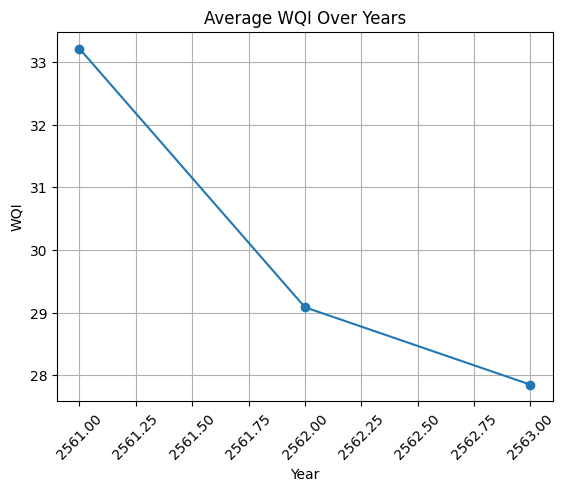

In [26]:
# Trend over year (if multiple years exist)
data.groupby('Year')['WQI'].mean().plot(marker='o')
plt.title("Average WQI Over Years")
plt.xlabel("Year")
plt.ylabel("WQI")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


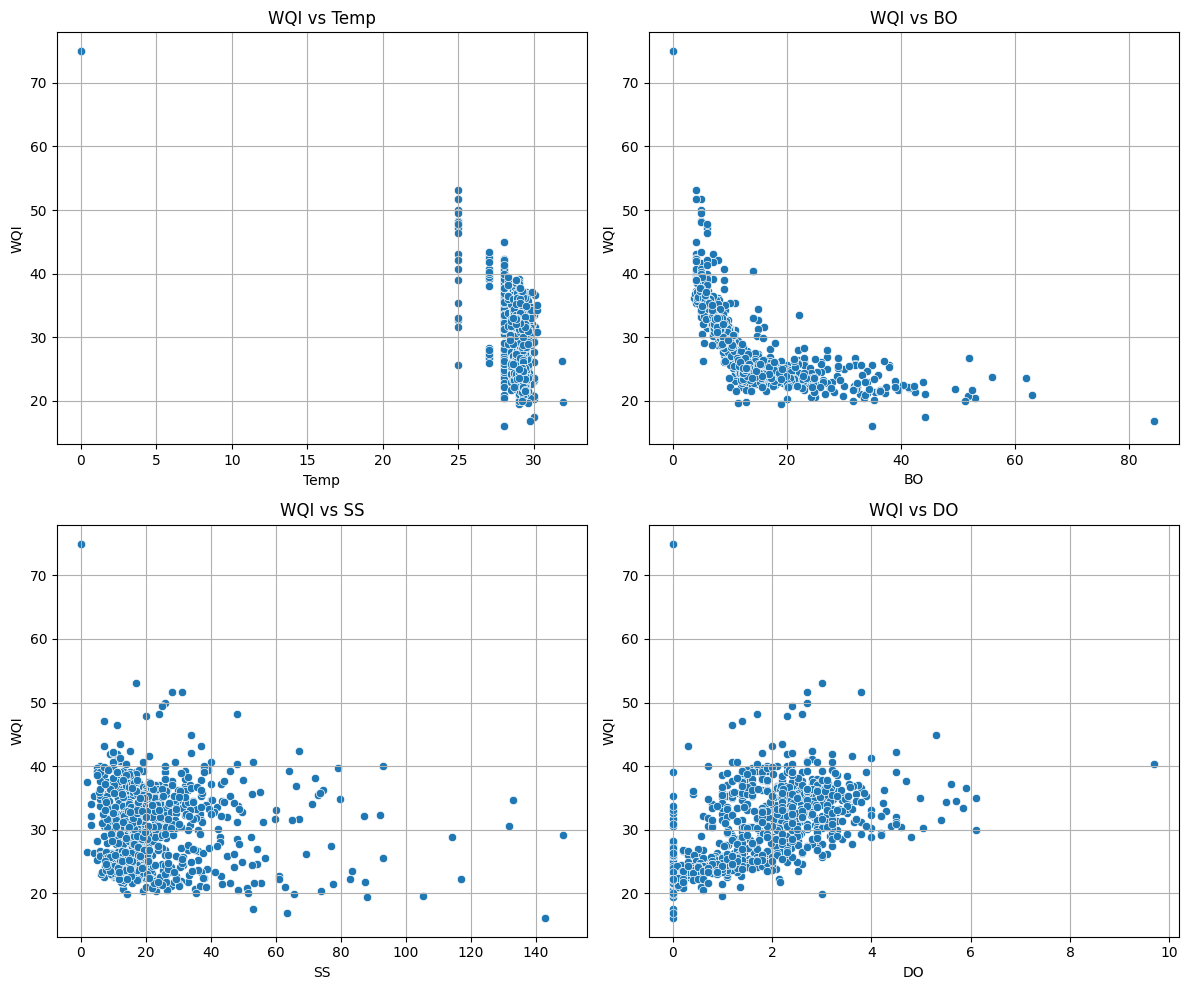

In [27]:
# Select top 4 key features to visualize against WQI
features = ['Temp', 'BO', 'SS', 'DO']
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()

for i, feature in enumerate(features):
    sns.scatterplot(data=data, x=feature, y='WQI', ax=axes[i])
    axes[i].set_title(f"WQI vs {feature}")
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel("WQI")
    axes[i].grid(True)

plt.tight_layout()
plt.show()

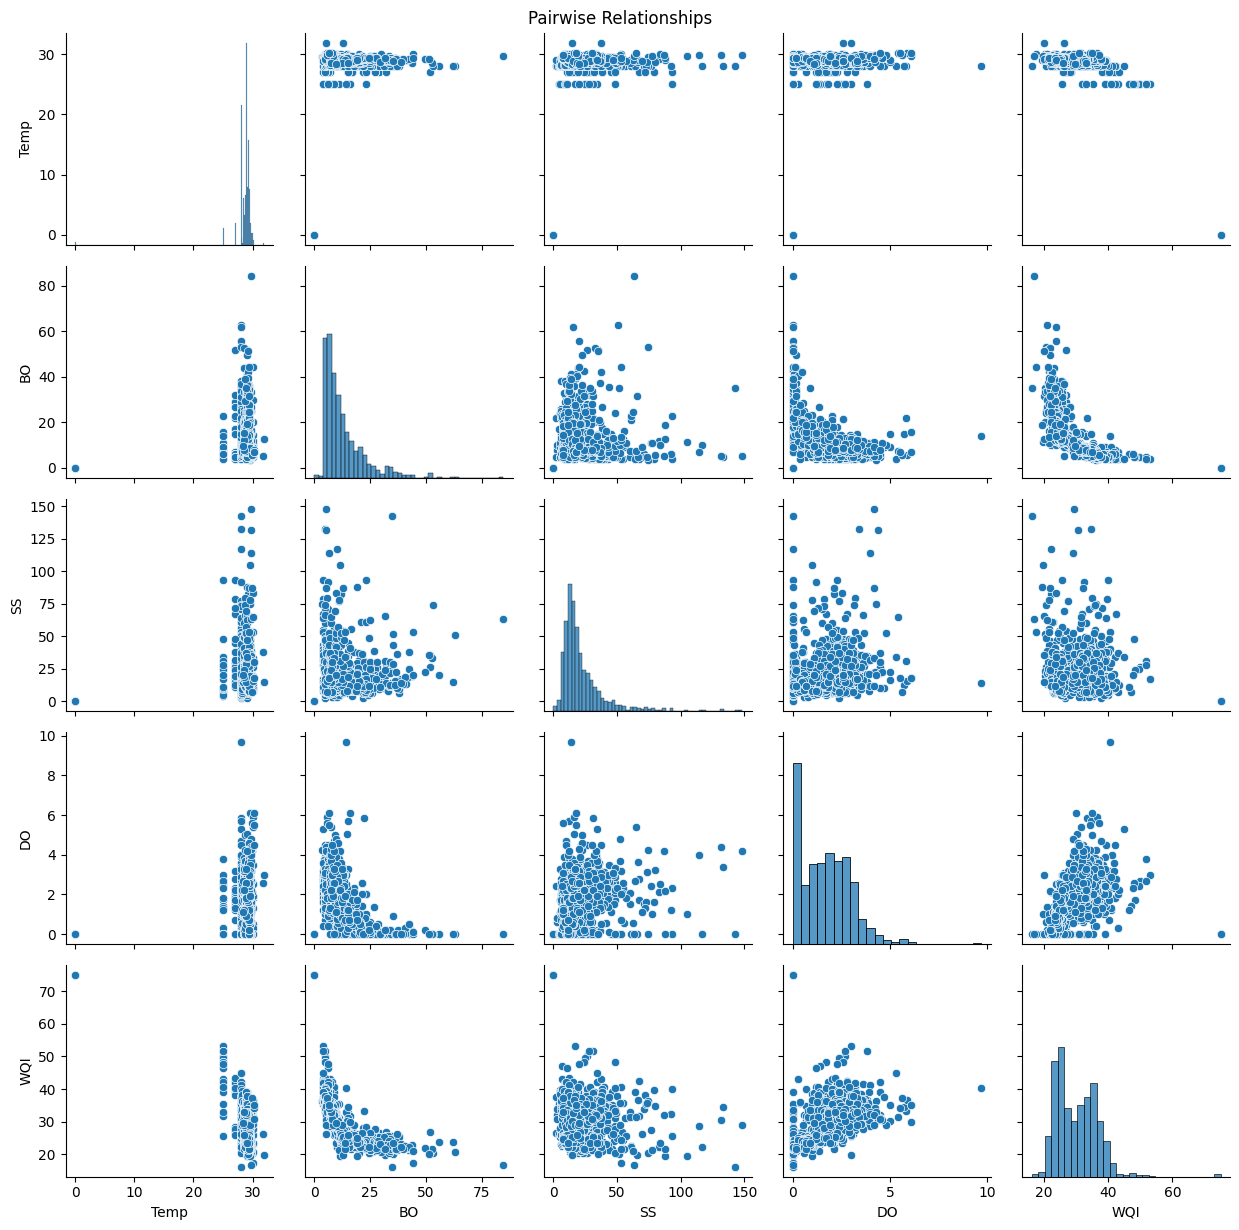

In [28]:
#pairplot
sns.pairplot(data[['Temp', 'BO', 'SS', 'DO', 'WQI']])
plt.suptitle("Pairwise Relationships")
plt.tight_layout()
plt.show()
